# Form Feature Extraction Speed Test

In [13]:
import sys
sys.path.insert(0, '..')
import time

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
import numpy as np

from lib.segmentation import FormFeatureExtraction

def _invalidate_cache(extractor):
    for method in extractor.__dict__.copy():
        del extractor.__dict__[method]
    extractor.segmentation = segmentation
    
def plot_bar(segmentation, cache=False):
    extractor = FormFeatureExtraction(segmentation)

    times = []
    for method in FormFeatureExtraction.methods:
        t = time.process_time()
        getattr(extractor, method)
        t = time.process_time() - t
        times.append(t)
        if not cache:
            _invalidate_cache(extractor)

    times = np.array(times)
    percentages = 100 * times / times.sum()

    plt.rcParams['figure.figsize'] = (15, 5)
    ticks = range(percentages.size)
    plt.bar(ticks, percentages, color='black', tick_label=ticks)
    plt.ylabel('Percentage')

## Generate PascalVOC segmentation

In [15]:
from lib.datasets import PascalVOC
from lib.segmentation import slic

image = PascalVOC('../test_data').test.next_batch(3, shuffle=False)[0][2]
segmentation = slic(image, num_segments=800, compactness=30, max_iterations=10, sigma=0)

## Perform speed test

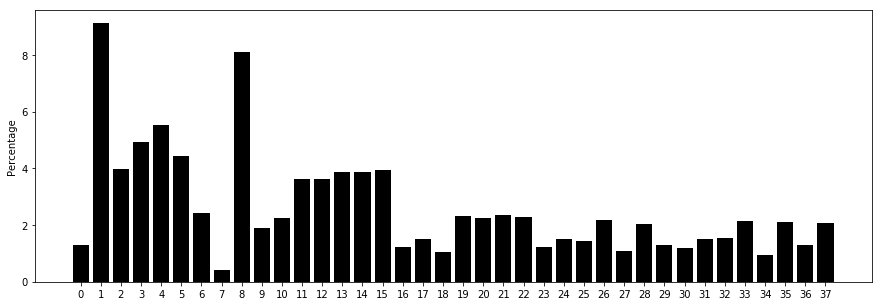

In [16]:
plot_bar(segmentation, cache=False)

In [17]:
for i, method in enumerate(FormFeatureExtraction.methods):
    print('{}: {}'.format(i, method))

0: area
1: bbox_area
2: bbox_height
3: bbox_width
4: centroid_x
5: centroid_y
6: eccentricity
7: equivalent_diameter
8: extent
9: hu_1
10: hu_2
11: hu_3
12: hu_4
13: hu_5
14: hu_6
15: hu_7
16: inertia_tensor_02
17: inertia_tensor_11
18: inertia_tensor_20
19: inertia_tensor_eigvals_1
20: inertia_tensor_eigvals_2
21: major_axis_length
22: minor_axis_length
23: mu_02
24: mu_03
25: mu_11
26: mu_12
27: mu_20
28: mu_21
29: mu_30
30: nu_02
31: nu_03
32: nu_11
33: nu_12
34: nu_20
35: nu_21
36: nu_30
37: orientation


## Validate that cache works

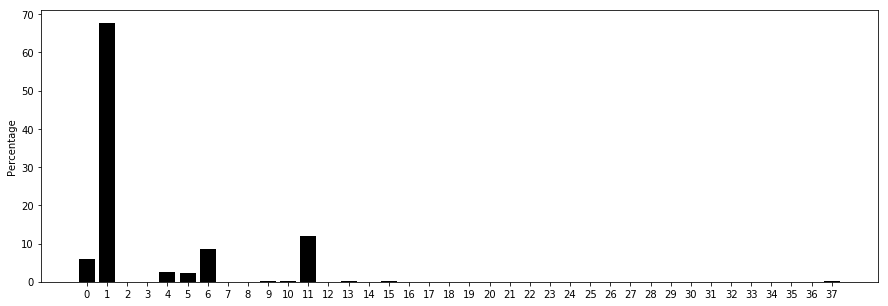

In [18]:
plot_bar(segmentation, cache=True)